# Projet Python

## Importation des librairies

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

## Construction du dataset

In [2]:
# Liste des features
with open('features.txt', 'r') as f:
    features = f.read().replace(" ", "").splitlines()

# Liste des activités pour la partie train
with open('y_train.txt', 'r') as f:
    y_train = f.read().splitlines()

# Liste des activités pour la partie test
with open('y_test.txt', 'r') as f:
    y_test = f.read().splitlines()

"""
# Liste du nom des activités
labels = []
with open('activity_labels.txt', 'r') as f:
    for line in f:
        line = line.split()
        labels.append(line[1])

# On remplace le numéro des activités par leur nom
for i in range(len(activities)):
    activities[i] = labels[int(activities[i])-1]
"""

# Construction du DataFrame pour la partie train
x_train = pd.read_csv('X_train.txt', sep=" ", header=None)
x_train.columns = features

# Construction du DataFrame pour la partie test
x_test = pd.read_csv('X_test.txt', sep=" ", header=None)
x_test.columns = features

In [3]:
# On affiche le dataset train
x_train

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-MeanFreq-1,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.012236,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,0.202804,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,0.440079,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,0.430891,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,0.137735,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7762,0.048048,-0.042445,-0.065884,-0.195448,-0.278326,-0.219954,-0.282233,-0.305861,-0.357803,0.267874,...,-0.008381,-0.596760,-0.879026,-0.190437,0.829718,0.206972,-0.425619,-0.792292,0.238580,0.056020
7763,0.037639,0.006430,-0.044345,-0.235372,-0.302680,-0.232843,-0.322483,-0.354464,-0.345592,0.181271,...,0.209452,-0.404418,-0.684496,0.064907,0.875679,-0.879033,0.400219,-0.772288,0.252653,0.056252
7764,0.037451,-0.002724,0.021009,-0.218281,-0.378082,-0.076950,-0.304446,-0.400661,-0.193071,0.113141,...,0.237003,0.000207,-0.317314,0.052806,-0.266724,0.864404,0.701169,-0.779566,0.249121,0.047071
7765,0.044011,-0.004536,-0.051242,-0.219202,-0.383350,-0.081035,-0.310419,-0.380233,-0.201007,0.166671,...,0.069366,0.037919,-0.356579,-0.101360,0.700740,0.936674,-0.589479,-0.785603,0.246409,0.031700


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x3A6597F0>,
      dtype=object)

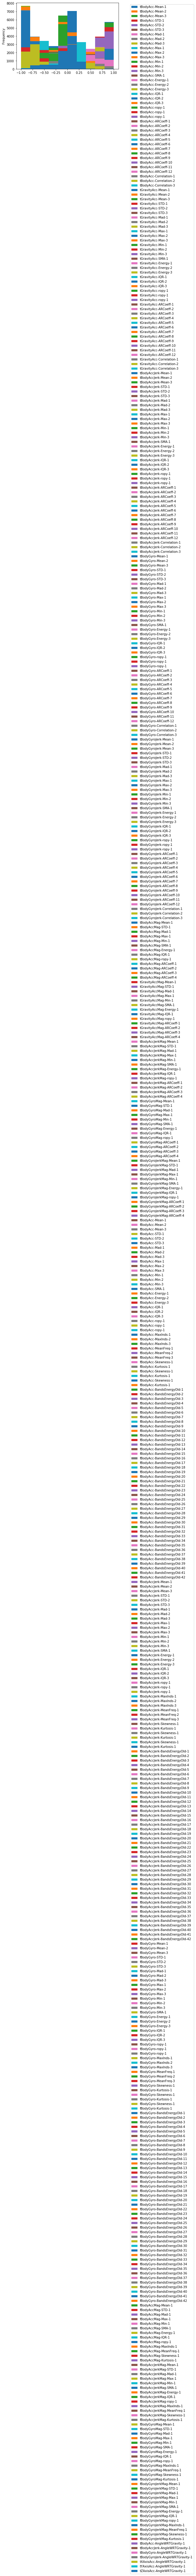

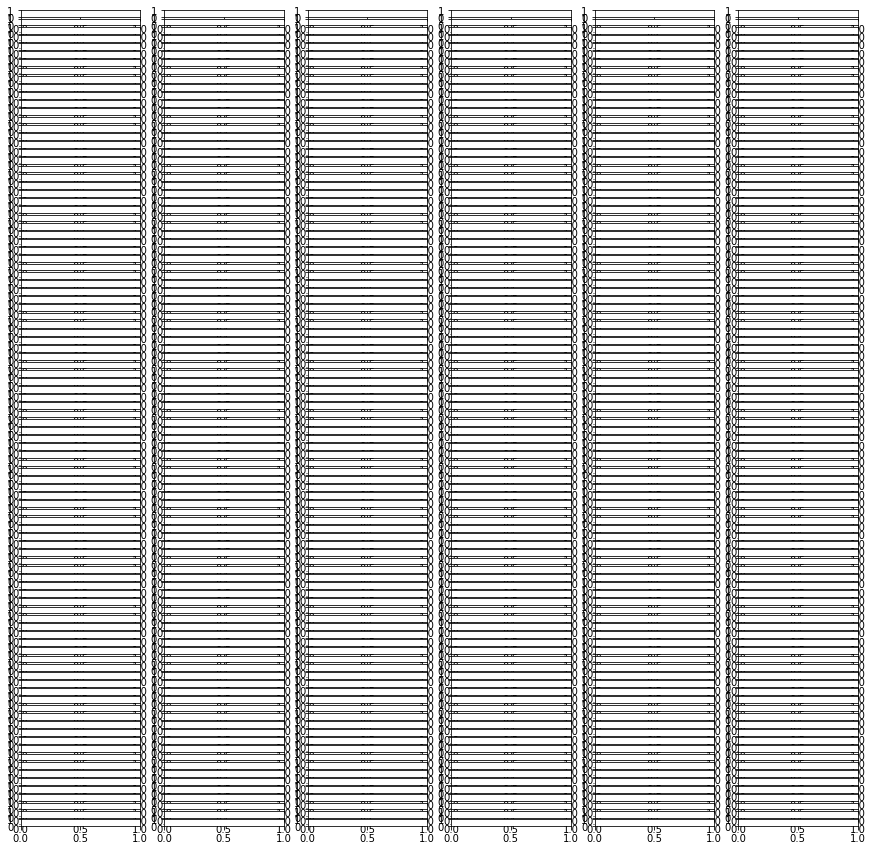

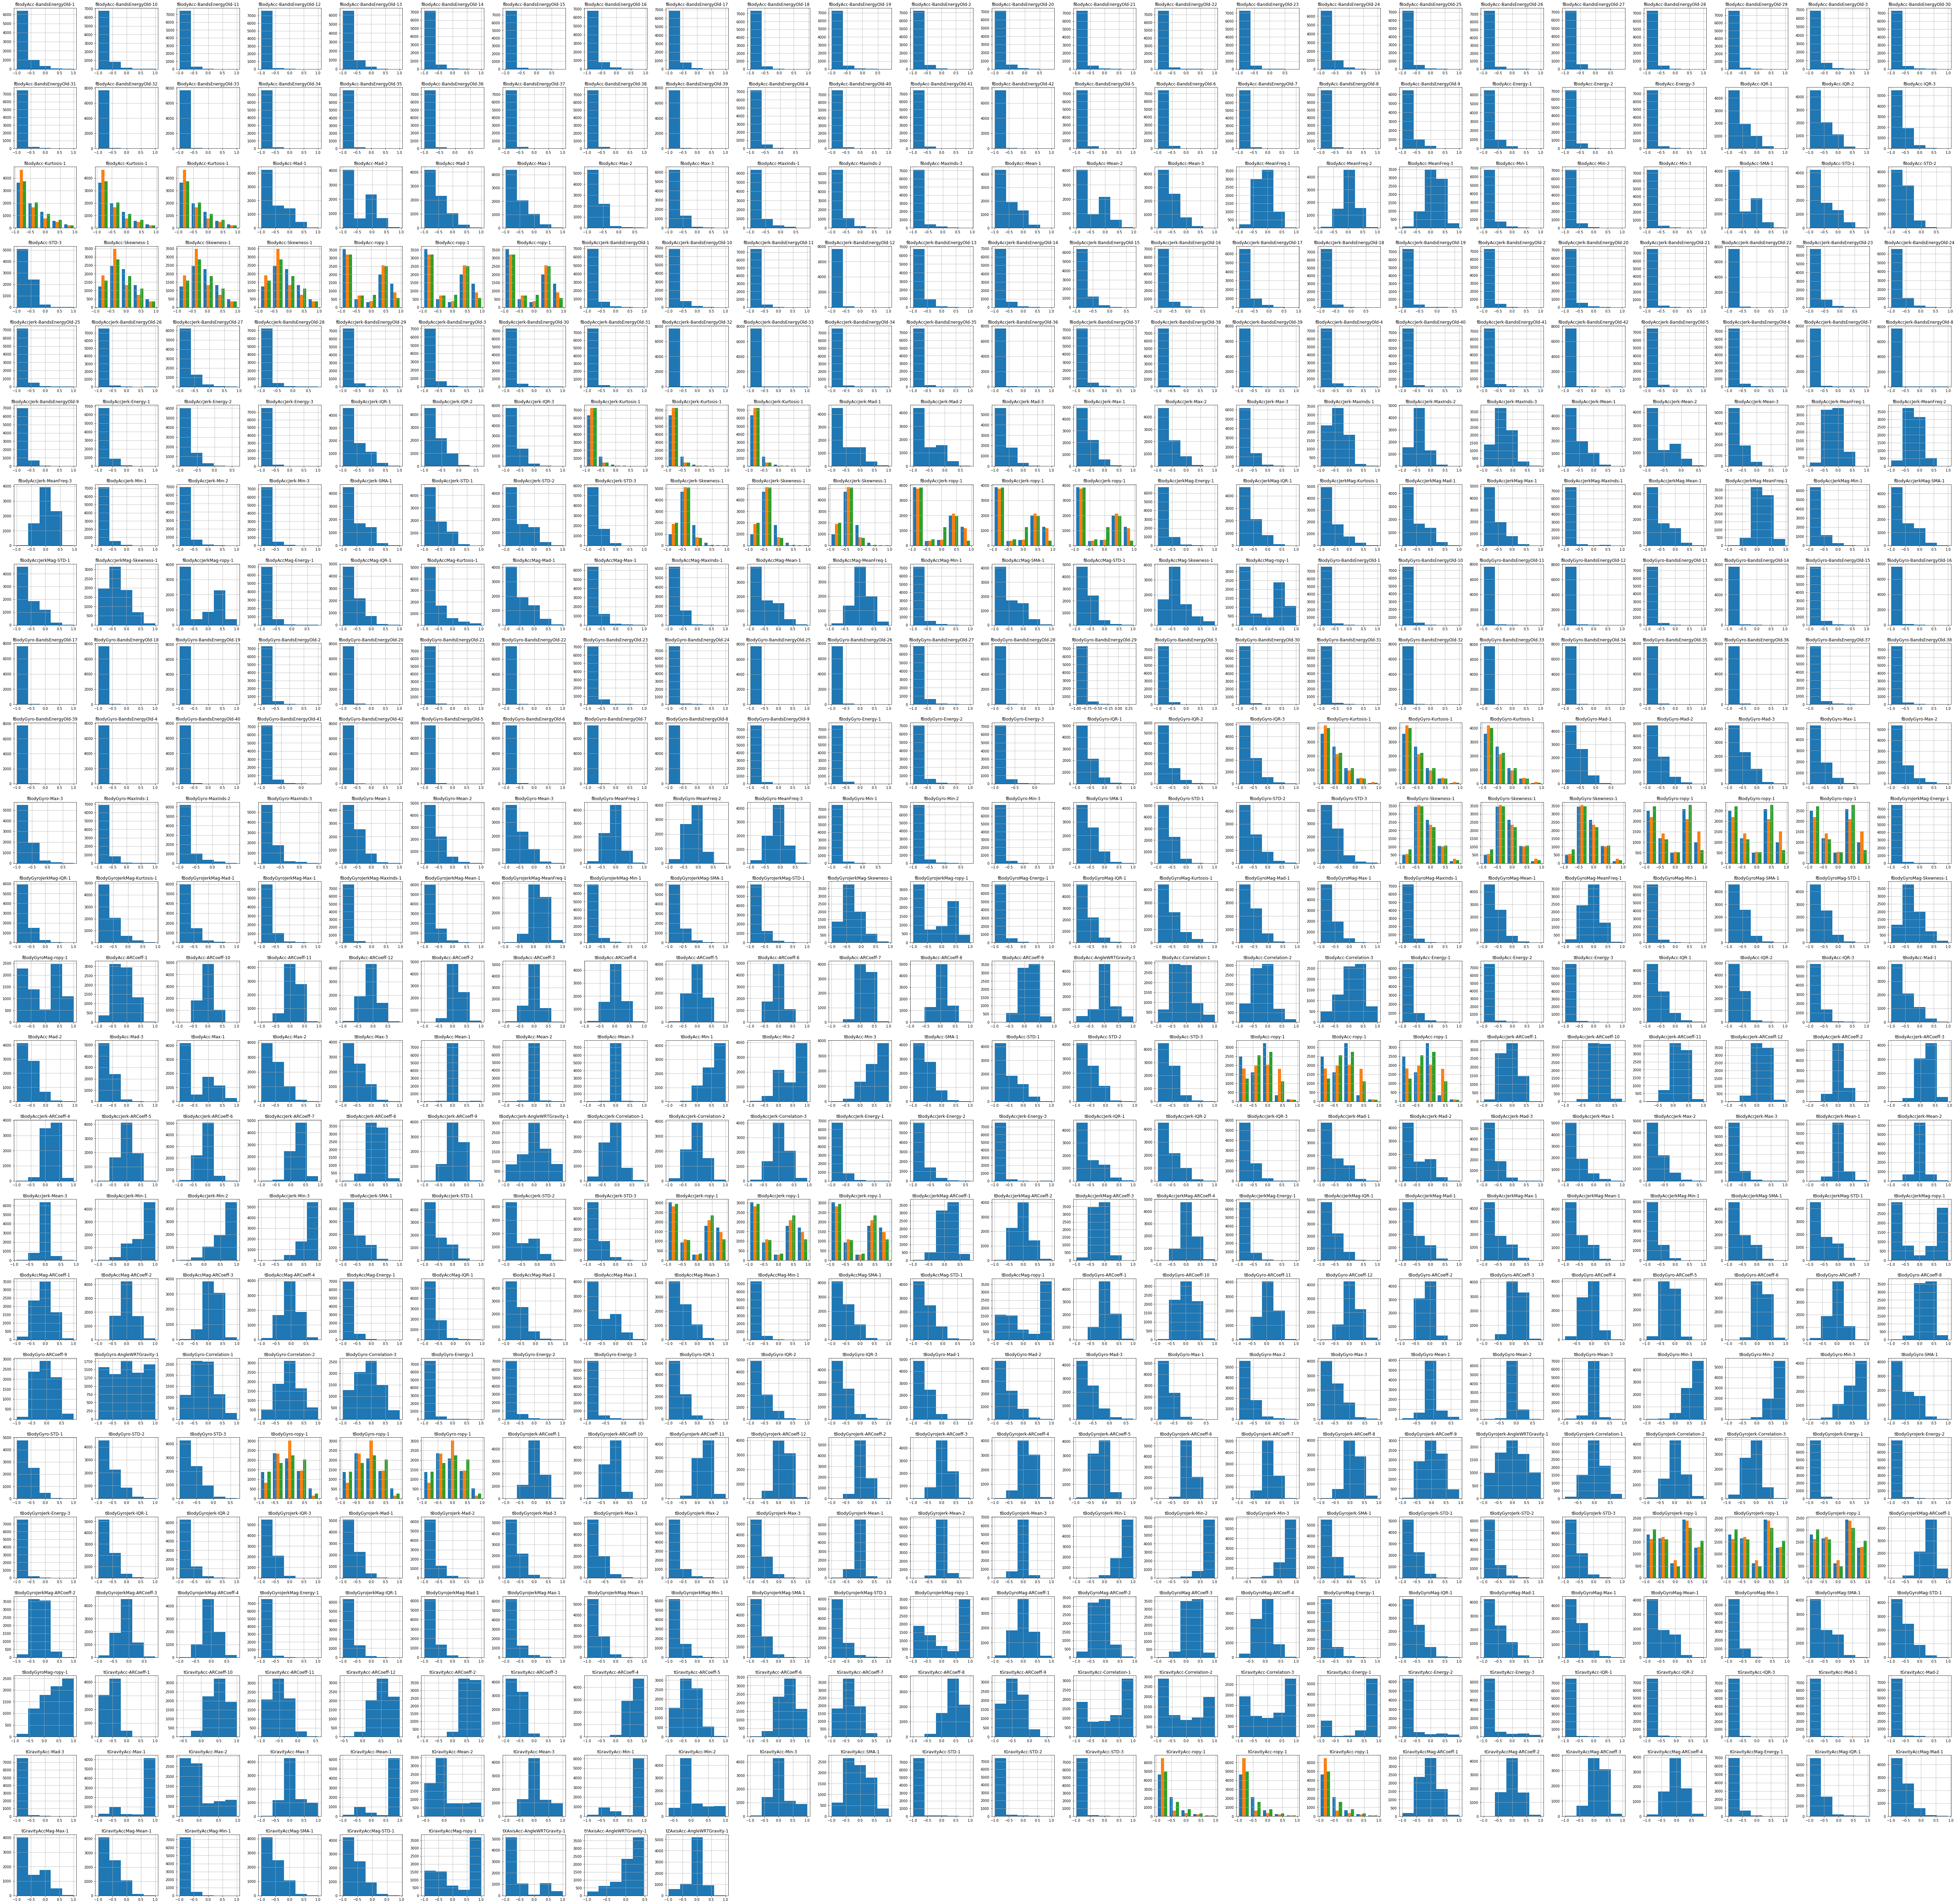

In [11]:
x_train.plot(kind='hist').legend(bbox_to_anchor=(1.1, 1))
plt.subplots(100, 6, figsize=(15, 15))
x_train.hist(figsize=(100, 100),
             bins=5)

In [33]:
LR = LogisticRegression(max_iter=10000, random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
LR.predict(x_test)
round(LR.score(x_test, y_test), 4)

MemoryError: Unable to allocate 33.2 MiB for an array with shape (7767, 561) and data type float64

In [28]:
SVM = svm.SVC(decision_function_shape="ovo").fit(x_train, y_train)
SVM.predict(x_test)
round(SVM.score(x_test, y_test), 4)

MemoryError: Unable to allocate 33.2 MiB for an array with shape (7767, 561) and data type float64

In [46]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(x_train, y_train)
RF.predict(x_test)
round(RF.score(x_test, y_test), 4)

0.9064

In [52]:
NN = MLPClassifier(max_iter=1000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(x_train, y_train)
NN.predict(x_test)
round(NN.score(x_test, y_test), 4)

0.9355